## Importing the necessary libraries 


In [3]:
import pandas as pd
import numpy as np

## Reading the train.csv

In [4]:
data = pd.read_csv('ols-data/data/cancer_new.csv', encoding='ISO-8859-1')
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


## Basic Data Exploration

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [6]:
data.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


## Missing Values


In [ ]:
null_values=data.isnull().sum()
print(null_values[null_values>0])

## Analyzing variables

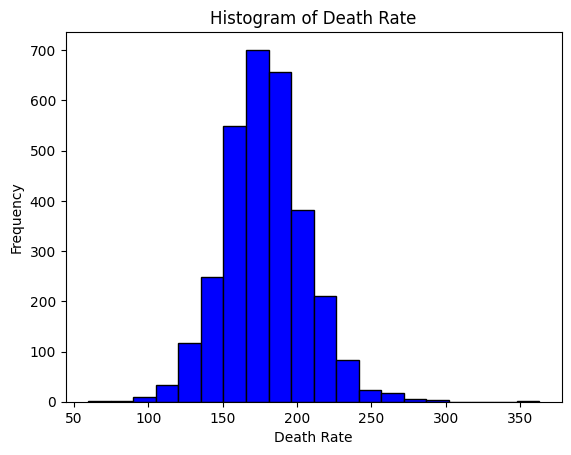

In [8]:
import matplotlib.pyplot as plt

plt.hist(data['TARGET_deathRate'],bins=20,color='blue',edgecolor='black')
plt.xlabel('Death Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Death Rate')
plt.show()

Observations:-

. Slightly Positively Skewed data
. there are outliers as well
. Normal Distributed Data
. Mean is greater than median(positively skewed data)
. There are 3 peaks in the data

Analyzing the outliers in target

In [9]:
import plotly.graph_objects as go 
import nbformat
fig = go.Figure(data=[go.Box(y=data['TARGET_deathRate'],boxpoints='outliers',jitter=0.3, pointpos=-1.8)])
fig.update_layout(
    title='Boxplot of death Rate',
    yaxis_title='Death Rate',
    width=700,
    height=500
)
fig.show()


In [17]:
!pip install --upgrade nbformat

### Analyzing the variable/column in data and finding relationship with target

Mean of avganncount :  606.3385437820807
Standard deviation of acgAnnCount :  1416.3562232267052


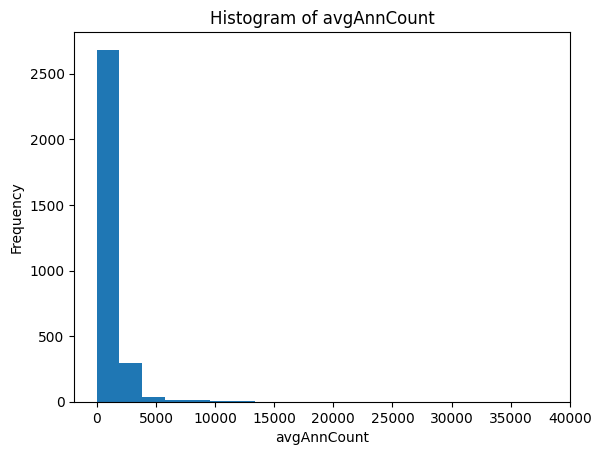

Correlation between avgAnnCount and TARGET_deathRate: -0.14353161968868802


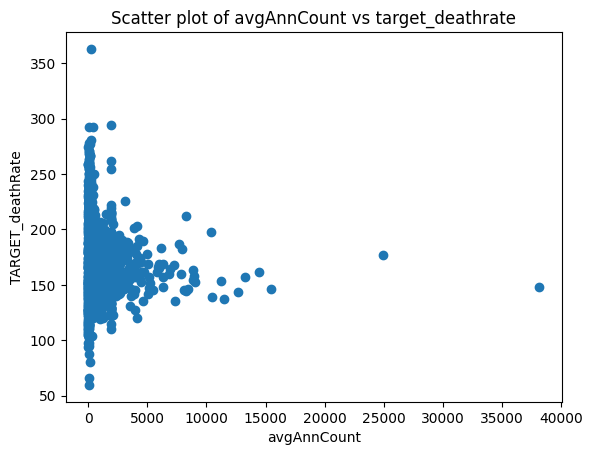

In [10]:
# Analyzing avgAnnCount column
avg_ann_count_mean=data["avgAnnCount"].mean()
avg_ann_count_std=data["avgAnnCount"].std()
print("Mean of avganncount : ",avg_ann_count_mean)
print("Standard deviation of acgAnnCount : ", avg_ann_count_std)

# create a histogram to visualize the distribution of avgAnncount
plt.hist(data["avgAnnCount"],bins=20)
plt.xlabel("avgAnnCount")
plt.ylabel("Frequency")
plt.title("Histogram of avgAnnCount")
plt.show()

# box plot 
fig=go.Figure(data=[go.Box(y=data['avgAnnCount'],boxpoints='outliers',jitter=0.3,pointpos=1.8)])
fig.update_layout(
    title='Boxplot of Avgnncount',
    yaxis_title='Death Rate',
    width=700,
    height=500
)
fig.show()

# calculate the correlation between avgAnnCount and target_deathrate
corr=data["avgAnnCount"].corr(data["TARGET_deathRate"])
print("Correlation between avgAnnCount and TARGET_deathRate:", corr)

# create a scatter plot to visualize the relationship between avgAnnCount and target variable
plt.scatter(data["avgAnnCount"],data["TARGET_deathRate"])
plt.xlabel("avgAnnCount")
plt.ylabel("TARGET_deathRate")
plt.title("Scatter plot of avgAnnCount vs target_deathrate")
plt.show()

## D'Agostino and Pearsons Test To Identify Normally Distributed Data & Outlier Detection

In [12]:
processed_data=pd.read_csv('ols-data/cancer_reg_processed.csv')
processed_data.head()
print(processed_data.shape)

(3047, 1904)


In [13]:
from scipy.stats import normaltest

numerical_columns = processed_data.select_dtypes(include=np.number).columns
gaussian_cols = []
non_gaussian_cols = []
for col in numerical_columns:
    stat, p = normaltest(processed_data[col])
    print('Statistics=%.3f, p=%.3f' % (stat,p))
    alpha = 0.05
    if p> alpha:
        gaussian_cols.append(col)
    else :
        non_gaussian_cols.append(col)
print(gaussian_cols)        

Statistics=5028.465, p=0.000
Statistics=5314.434, p=0.000
Statistics=127.363, p=0.000
Statistics=943.641, p=0.000
Statistics=854.431, p=0.000
Statistics=5801.694, p=0.000
Statistics=408.566, p=0.000
Statistics=4449.679, p=0.000
Statistics=4715.992, p=0.000
Statistics=42.880, p=0.000
Statistics=48.305, p=0.000
Statistics=2293.395, p=0.000
Statistics=236.299, p=0.000
Statistics=508.655, p=0.000
Statistics=39.668, p=0.000
Statistics=1395.030, p=0.000
Statistics=55.596, p=0.000
Statistics=536.946, p=0.000
Statistics=87.619, p=0.000
Statistics=471.048, p=0.000
Statistics=73.543, p=0.000
Statistics=9.139, p=0.010
Statistics=20.036, p=0.000
Statistics=1.039, p=0.595
Statistics=114.894, p=0.000
Statistics=933.419, p=0.000
Statistics=1377.835, p=0.000
Statistics=4033.108, p=0.000
Statistics=3071.494, p=0.000
Statistics=218.834, p=0.000
Statistics=893.748, p=0.000
Statistics=55.722, p=0.000
Statistics=1290.293, p=0.000
Statistics=847.167, p=0.000
Statistics=10017.746, p=0.000
Statistics=10017.74

In [18]:
# checking how many columns are normally distributed
gaussian_cols

['PctPublicCoverage']

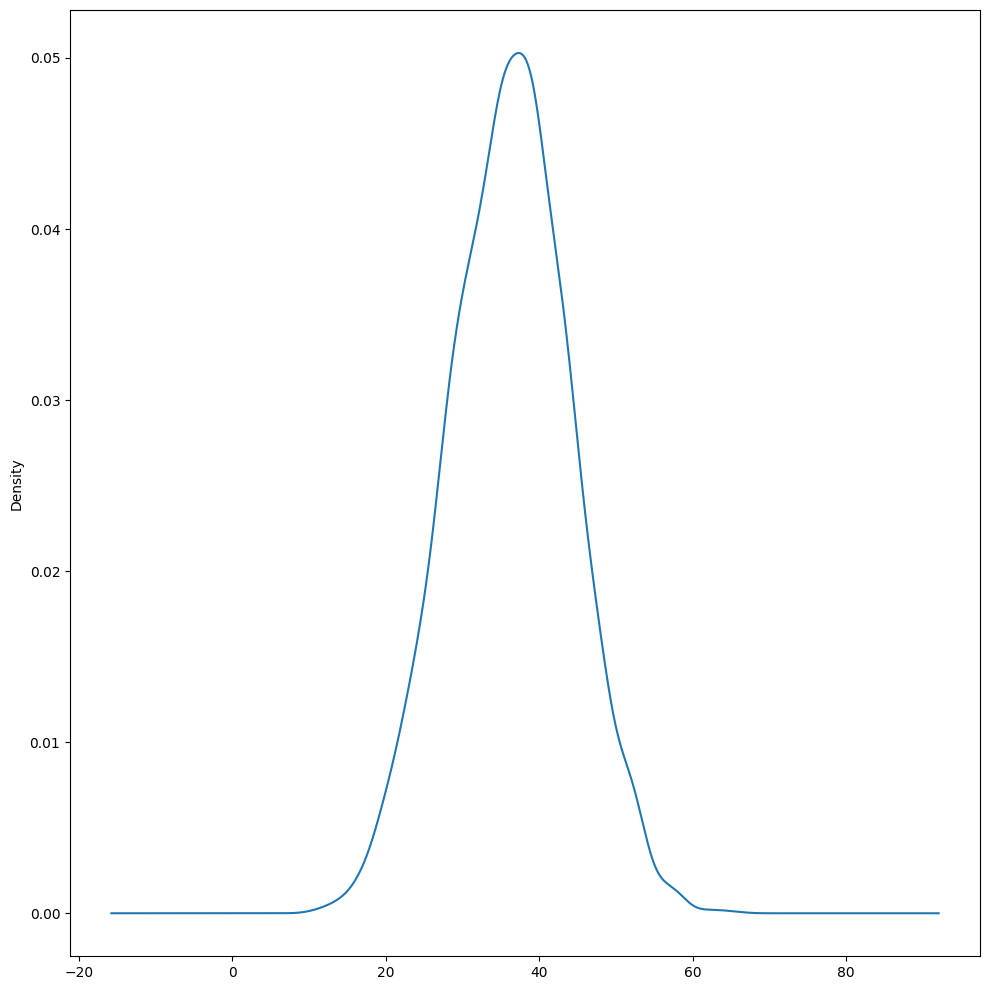

In [14]:
#make subplots for all guassian cols as density plots

fig, axes =plt.subplots(nrows=1,ncols=1,figsize=(10,10))
for i,col in enumerate(gaussian_cols):
    processed_data[col].plot(kind='density',ax=axes, subplots=True, sharex=False)
plt.tight_layout()
plt.show()

## Now we need to find outliers for guassian data using 

In [16]:
gaussian_data=processed_data[gaussian_cols]
basic_info_gaussian= gaussian_data.describe()

In [21]:
gaussian_data

,PctPublicCoverage
0,32.9
1,31.1
2,42.1
3,45.3
4,44.0
...,...
3042,31.7
3043,28.8
3044,26.6
3045,29.5


In [17]:
# take the mean. std, min,max for every guassian column
basic_info_gaussian=basic_info_gaussian.loc[['mean','std','min','max']]
basic_info_gaussian

,PctPublicCoverage
mean,36.252642
std,7.841741
min,11.200000
max,65.100000


### Z-Score range


In [18]:
#dealing with outlier values for PctPublicCoverage column
print("Highest allowed",basic_info_gaussian["PctPublicCoverage"]["mean"]+3*basic_info_gaussian["PctPublicCoverage"]["std"])
print("Lowest allowed",basic_info_gaussian["PctPublicCoverage"]["mean"]-3*basic_info_gaussian["PctPublicCoverage"]["std"])

processed_data[(processed_data['PctPublicCoverage']>59.777864755203105) | (processed_data['PctPublicCoverage']< 12.727419130586192 )]

Highest allowed 59.777864755203105
Lowest allowed 12.727419130586192


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
176,25.0,10,134.3,359.0,27627,4596,24.2,0.000000,42.6,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,862.0,283,136.5,364.9,122641,375629,3.9,449.912014,35.3,34.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1486,1067.0,358,142.9,444.5,51907,118891,10.9,84.110656,65.3,64.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2713,8.0,3,203.3,201.3,68387,5702,9.9,0.000000,36.8,38.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,129.0,54,126.1,332.0,32533,20152,22.8,0.000000,54.8,54.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Function for Handling outliers in guassian columns using z-score

In [19]:
def deal_with_outliers(df,col,basic_info):
    highest_allowed=basic_info[col]["mean"]+3*basic_info[col]["std"]
    lowest_allowed=basic_info[col]["mean"]-3*basic_info[col]["std"]
    df= df[(df[col] > highest_allowed) | (df[col]< lowest_allowed) ]
    return df
cols_have_outliers = []
for col in gaussian_cols:
    df = deal_with_outliers(gaussian_data, col, basic_info_gaussian)
    shape= df.shape
    if shape[0]>0:
        cols_have_outliers.append(col)
print(cols_have_outliers)

['PctPublicCoverage']


## Trimming

Now we need to trim the cols with outliers data from the original data 

In [20]:
#trimming

for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3*basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3*basic_info_gaussian[col]["std"]
    trimmed_data=processed_data[(processed_data[col]<highest_allowed) & (processed_data[col]>lowest_allowed)]
trimmed_data    

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now the trimmed data contains the cols with no outliers update it in the original data frame

## Capping

capping ia a teachnique to handle outliers in a dataset. 
it is a way to handle outliers by replacing the values that are furthest away from the center of the distribution with a max or min value.

capping is more efficient as it has the advantage of preserving the original distribution of the data unlike trimming.

Capping can also introduce bias into the data if the cap values is not chosen appropriately.

In [21]:
#capping

capped_data = processed_data.copy()  # Initialize outside the loop

for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3 * basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3 * basic_info_gaussian[col]["std"]
    
    # Cap the outliers for the current column
    capped_data.loc[capped_data[col] > highest_allowed, col] = highest_allowed
    capped_data.loc[capped_data[col] < lowest_allowed, col] = lowest_allowed

capped_data  # Now contains all capped columns


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


getting updated data of normal dist


In [22]:
data=capped_data

In [23]:
data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## To Identify Skewness


In [24]:
#remove columns which are categorical and have less than 10 unique values
cols_to_remove=[]
for col in data.columns:
    if data[col].nunique()<10:
        cols_to_remove.append(col)
print(len(cols_to_remove))
data_for_skewness= data.drop(cols_to_remove,axis=1)        

1870


In [25]:
def identify_skewed_cols(df,cols):
    skewed_cols = []
    for col in cols:
        skew = df[col].skew()
        if skew >1 or skew < -1:
            skewed_cols.append(col)
    return skewed_cols

skewed_cols = identify_skewed_cols(data_for_skewness,data_for_skewness.columns)
len(skewed_cols)

16

In [26]:
skewed_data=data_for_skewness[skewed_cols]

In [27]:
skewed_data

,avgAnnCount,avgDeathsPerYear,medIncome,popEst2015,studyPerCap,MedianAge,AvgHouseholdSize,PctBachDeg18_24,PctBachDeg25_Over,PctWhite,PctBlack,PctAsian,PctOtherRace,BirthRate,upper_bound,median
0,1397.000000,469,61898,260131,499.748204,39.3,2.54,6.9,19.6,81.780529,2.594728,4.821857,1.843479,6.118831,125635.0,93564.75
1,173.000000,70,48127,43269,23.111234,33.0,2.34,7.5,22.7,89.228509,0.969102,2.246233,3.741352,4.333096,51046.4,49534.00
2,102.000000,50,49348,21026,47.560164,45.0,2.62,9.5,16.0,90.922190,0.739673,0.465898,2.747358,3.729488,51046.4,49534.00
3,427.000000,202,44243,75882,342.637253,42.8,2.52,2.5,9.3,91.744686,0.782626,1.161359,1.362643,4.603841,45201.0,43962.70
4,57.000000,26,49955,10321,0.000000,48.3,2.34,2.0,15.0,94.104024,0.270192,0.665830,0.492135,6.796657,51046.4,49534.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,46961,6343,0.000000,44.2,2.08,8.4,15.2,90.280811,3.837754,0.327613,1.700468,7.773512,48021.6,46611.30
3043,1962.667684,43,48609,37118,377.175494,30.4,2.90,3.8,12.4,75.706245,2.326771,4.044920,14.130288,8.186470,51046.4,49534.00
3044,1962.667684,46,51144,34536,1968.959926,30.9,3.04,2.5,12.8,87.961629,2.313188,1.316472,5.680705,7.809192,54545.6,52796.00
3045,1962.667684,52,50745,25609,0.000000,39.0,2.56,4.1,14.4,92.905681,1.176562,0.244632,2.131790,7.582938,51046.4,49534.00


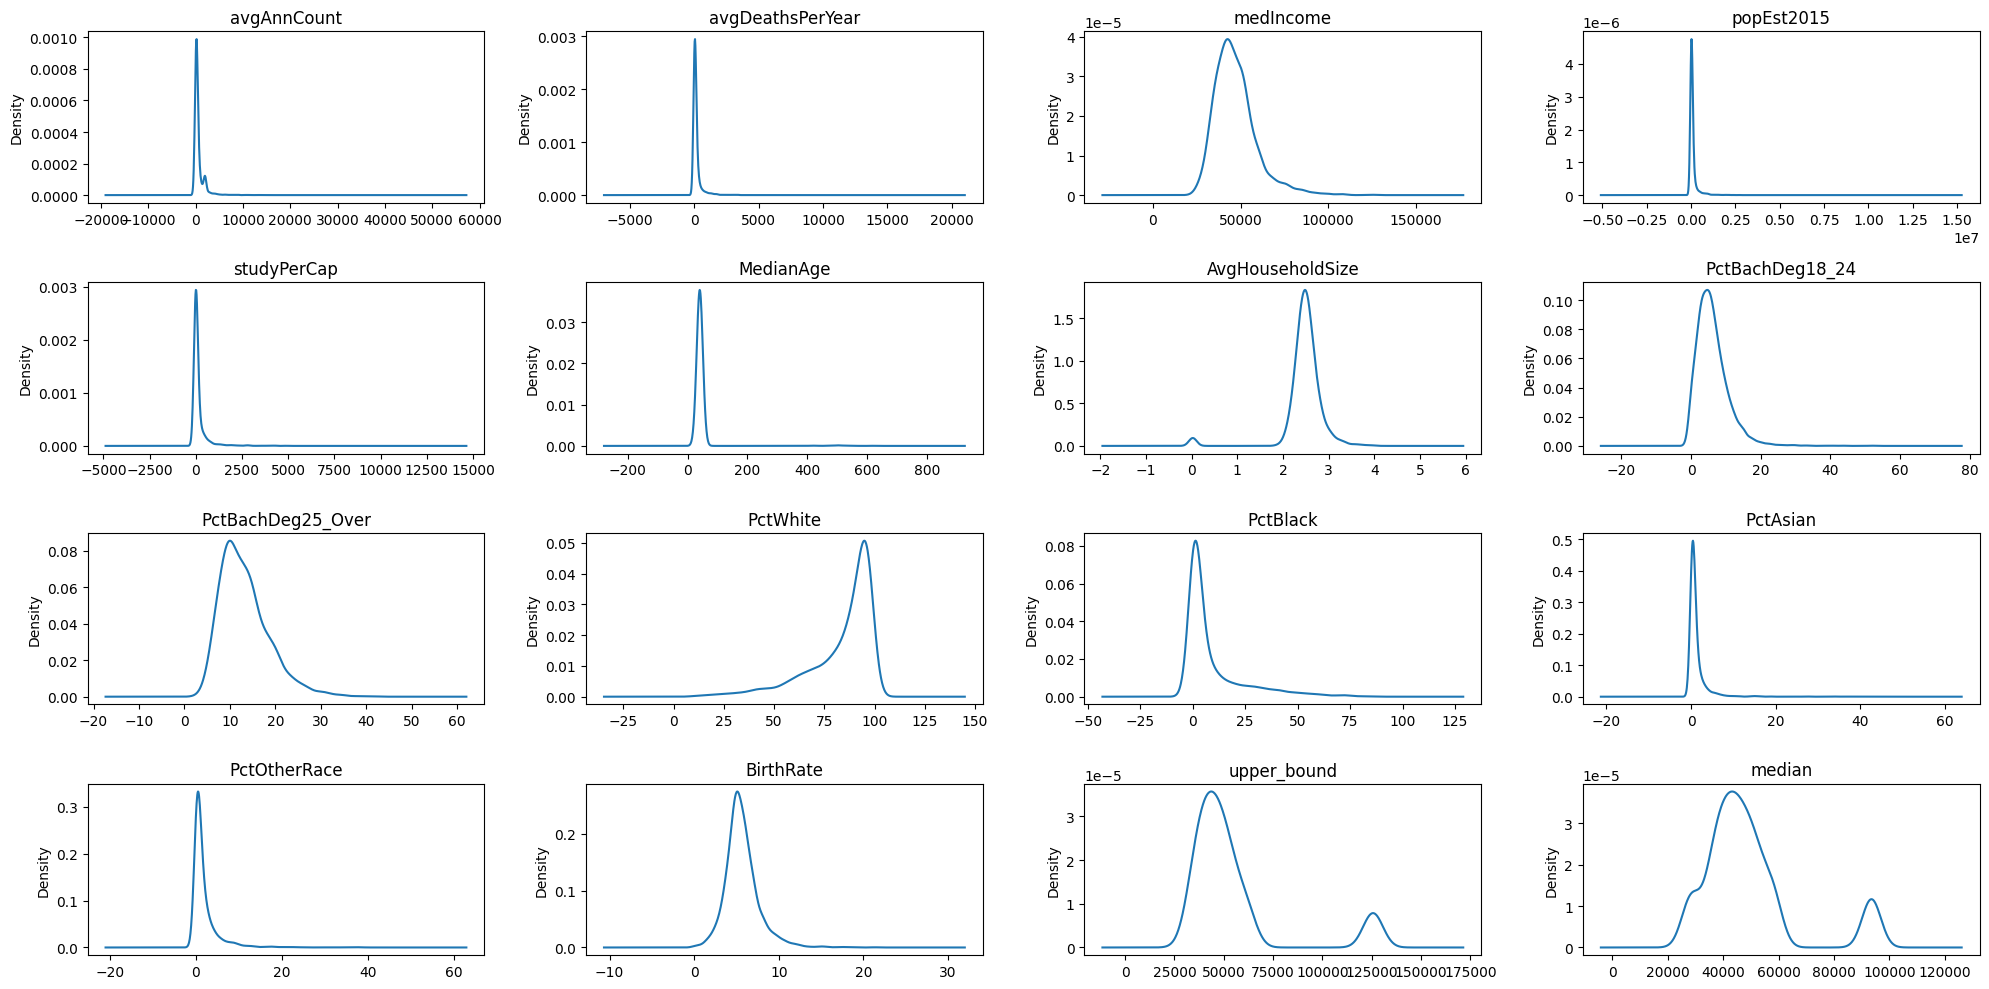

In [28]:
# plot the distribution of the skewed columns which is arounf 8 columns 

fig, axes= plt.subplots(nrows=4,ncols=4,figsize=(20,10))
for i,col in enumerate(skewed_cols):
    #plot title
    axes[i//4,i%4].set_title(col)
    skewed_data[col].plot(kind='density', ax=axes[i//4,i%4], subplots=True,sharex=False)
plt.tight_layout()
plt.show()

In [29]:
#box-plot to check if any outliers
def box_plot(df,col):
    fig=go.Figure(data=[go.Box(y=df[col], boxpoints='outliers', jitter=0.3, pointpos=1.8)])
    fig.update_layout(
        title='Boxplot of' + col,
        yaxis_title=col,
        width=500,
        height=500
    )
    fig.show()

for col in skewed_cols:
    box_plot(data,col)

In [30]:
#checking outlier values for studycarcap column

percentile25 = data['studyPerCap'].quantile(0.25)
percentile75 = data['studyPerCap'].quantile(0.75)

iqr = percentile75- percentile25

upper_limit = percentile75+1.5*iqr
lower_limit = percentile25-1.5*iqr
print("Upper limit",upper_limit)
print("Lower limti",lower_limit)

data[(data['studyPerCap']>upper_limit) | (data['studyPerCap']<lower_limit)]


Upper limit 209.1269406875
Lower limti -125.4761644125


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,4025.000000,1380,177.8,510.900000,60397,843954,13.1,427.748432,35.8,34.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,740.000000,269,172.7,499.300000,51395,121846,15.7,837.122269,41.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,37.2,35.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,1962.667684,138,153.7,453.549422,49246,118053,19.4,660.720185,28.8,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039,1962.667684,9,208.3,453.549422,49256,2968,10.5,673.854447,45.2,45.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,32.2,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# removing outliers in skewed columns using the iqr method

def deal_with_outlier_with_iqr(df,col):
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)

    iqr = percentile75- percentile25

    upper_limit = percentile75+1.5*iqr
    lower_limit = percentile25-1.5*iqr
    outliers=df[(df[col]>upper_limit) |(df[col]<lower_limit) ]
    return outliers
cols_have_outliers_skewed = []
for col in skewed_cols:
    outliers= deal_with_outlier_with_iqr(data,col)
    shape=outliers.shape
    if shape[0] > 0:
        cols_have_outliers_skewed.append(col)
print(cols_have_outliers_skewed)

['avgAnnCount', 'avgDeathsPerYear', 'medIncome', 'popEst2015', 'studyPerCap', 'MedianAge', 'AvgHouseholdSize', 'PctBachDeg18_24', 'PctBachDeg25_Over', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'BirthRate', 'upper_bound', 'median']


### Trimming

In [33]:
#find how many values which are greater than upper limit and lower than lower limit 
rows_to_remove=data[(data['studyPerCap'] > upper_limit) | (data['studyPerCap'] < lower_limit)]
# trim the data
trimmed_data= data[(data['studyPerCap'] < upper_limit) & (data['studyPerCap']>lower_limit)]
trimmed_data.shape

(2543, 1904)

# Capping

In [34]:
# cap the data
def capping(df,col):
    percentile25=df[col].quantile(0.25)
    percentile75=df[col].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr
    df.loc[df[col]>upper_limit,col]=upper_limit
    df.loc[df[col]<lower_limit,col]=lower_limit
    return df

for col in cols_have_outliers_skewed:
    capped_data=capping(data,col)


C:\Users\PRASHANTH REDDY\AppData\Local\Temp\ipykernel_15104\1461849770.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '330.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\PRASHANTH REDDY\AppData\Local\Temp\ipykernel_15104\1461849770.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72906.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\PRASHANTH REDDY\AppData\Local\Temp\ipykernel_15104\1461849770.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '154151.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [35]:
# box-plot for capped data
for col in cols_have_outliers_skewed:
    box_plot(data,col)

In [36]:
data.to_csv('ols-data/capped_data.csv',index=False)